[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/masanorihirano/pams/blob/main/examples/price_limit.ipynb)

In [1]:
# Please remove comment-out if necessary
#! pip install pams matplotlib

In [7]:
config = {
	"simulation": {
		"markets": ["Market"],
		"agents": ["FCNAgents"],
		"sessions": [
			{	"sessionName": 0,
				"iterationSteps": 100,
				"withOrderPlacement": True,
				"withOrderExecution": False,
				"withPrint": True
			},
			{	"sessionName": 1,
				"iterationSteps": 500,
				"withOrderPlacement": True,
				"withOrderExecution": True,
				"withPrint": True,
				"events": ["PriceLimitRule"]
			}
		]
	},

	"PriceLimitRule": {
		"class": "PriceLimitRule",
		"referenceMarket": "Market",
		"targetMarkets": ["Market"],
		"triggerChangeRate": 0.05,
		"enabled": True
	},

	"Market": {
		"class": "Market",
		"tickSize": 0.00001,
		"marketPrice": 300.0,
		"outstandingShares": 25000
	},

	"FCNAgents": {
		"class": "FCNAgent",
		"numAgents": 100,

		"markets": ["Market"],
		"assetVolume": 50,
		"cashAmount": 10000,

		"fundamentalWeight": {"expon": [0.2]},
		"chartWeight": {"expon": [0.0]},
		"noiseWeight": {"expon": [1.0]},
		"noiseScale": 0.001,
		"timeWindowSize": [100, 200],
		"orderMargin": [0.0, 0.1]
	}
}


In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pams.runners import SequentialRunner
from pams.logs.market_step_loggers import MarketStepSaver

In [9]:
saver = MarketStepSaver()

runner = SequentialRunner(
    settings=config,
    prng=random.Random(42),
    logger=saver,
)
runner.main()

# INITIALIZATION TIME 0.006271
# EXECUTION TIME 0.119255


In [10]:
market_prices = dict(sorted(map(lambda x: (x["market_time"], x["market_price"]), saver.market_step_logs)))
fundamental_prices = dict(sorted(map(lambda x: (x["market_time"], x["fundamental_price"]), saver.market_step_logs)))

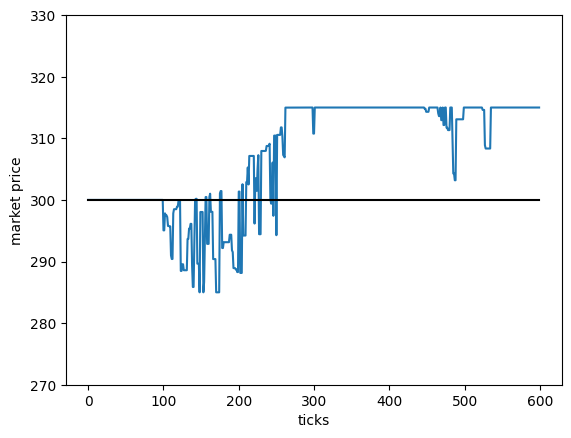

In [11]:
plt.plot(list(market_prices.keys()), list(market_prices.values()))
plt.plot(list(fundamental_prices.keys()), list(fundamental_prices.values()), color='black')
plt.xlabel("ticks")
plt.ylabel("market price")
plt.ylim([270, 330])
plt.show()